**1) Write a python program to create a Convolutional Base using CIFAR10
dataset and display the summary of the model.(Use ReLU activation
Function).**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Build Convolutional Base
model = models.Sequential()

# Convolution + ReLU + MaxPooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 3. Flatten and Dense layers (optional base extension)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))   # 10 classes (no softmax yet, base focus)

# 4. Display Model Summary
model.summary()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**2) Write a python program to add the dense layers on the top of the above
created model and display the summary, evaluate the accuracy of the model.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Build Convolutional Base
base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 3. Add Dense Layers on top
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes
])

# 4. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# 6. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# 7. Display Results
print("\nModel Summary:")
model.summary()
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 86ms/step - accuracy: 0.3493 - loss: 1.7691 - val_accuracy: 0.5266 - val_loss: 1.3418
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.5474 - loss: 1.2641 - val_accuracy: 0.5917 - val_loss: 1.1536
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6151 - loss: 1.0837 - val_accuracy: 0.6377 - val_loss: 1.0302
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.6598 - loss: 0.9718 - val_accuracy: 0.6664 - val_loss: 0.9543
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.6853 - loss: 0.9039 - val_accuracy: 0.6903 - val_loss: 0.8910
313/313 - 4s - 12ms/step - accuracy: 0.6903 - loss: 0.8910

Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 4, 4, 64)       │        56,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)


✅ Test Accuracy: 0.6903


**3) Write a python program to implement a Handwritten Digit Recognition
system using CNN .( Use MNIST Dataset)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 2. Preprocess Data
# reshape to (28,28,1) for CNN input and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes (digits 0–9)
])

# 4. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("\nModel Summary:")
model.summary()
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 124ms/step - accuracy: 0.8675 - loss: 0.4370 - val_accuracy: 0.9780 - val_loss: 0.0665
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9855 - val_loss: 0.0440
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.9880 - loss: 0.0394 - val_accuracy: 0.9856 - val_loss: 0.0435
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9857 - val_loss: 0.0431
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9932 - loss: 0.0230 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9895 - val_loss: 0.0315
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9889 - val_loss: 0.0345
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9966 - loss: 0.0102

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)


✅ Test Accuracy: 0.9892


**4) Consider any image of .jpeg format and apply the convolution layer,
activation layer and pooling layer operation to extract the inside
feature.Visualize the outputs of all layers.**

Saving Untitled.jpeg to Untitled (3).jpeg


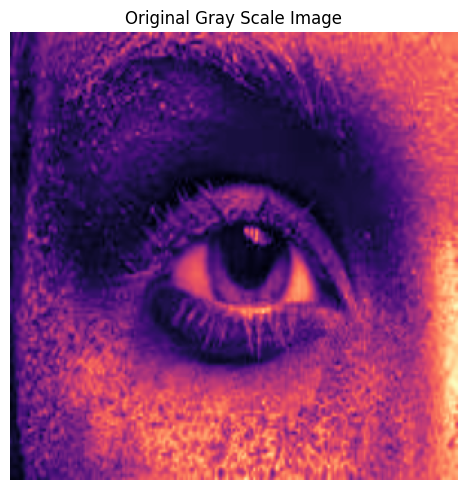

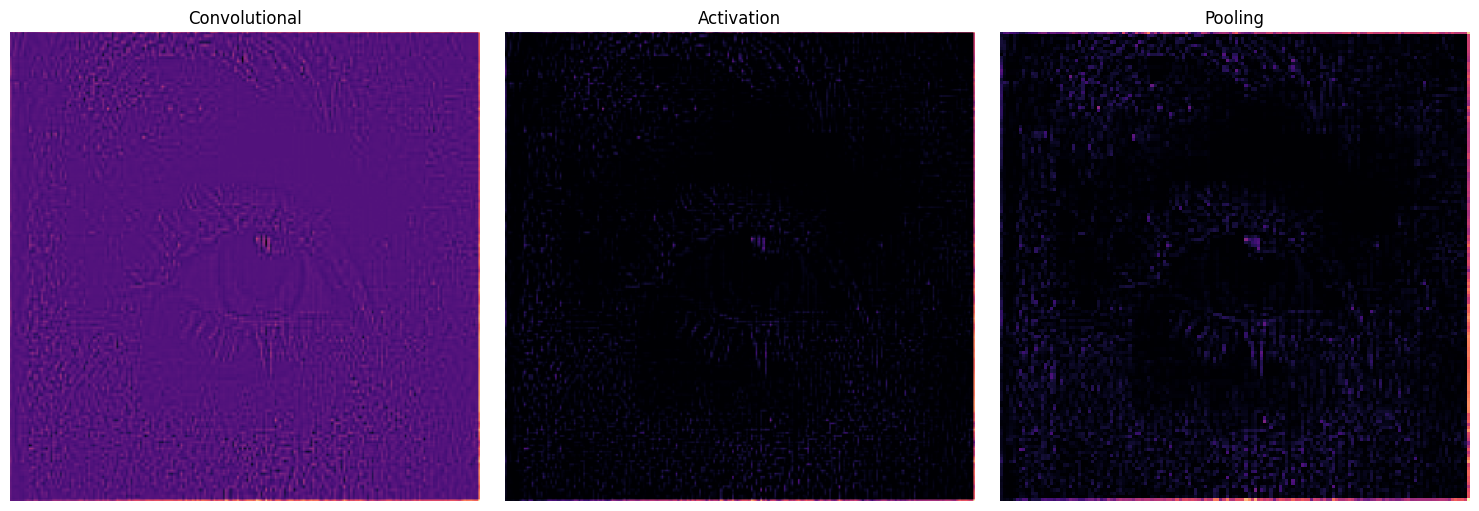

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
from google.colab import files

# Upload manually
uploaded = files.upload()


# Set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Load the image
image = tf.io.read_file('Untitled.jpeg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=(300, 300))

# Plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title("Original Gray Scale Image")
plt.show()

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


# Convolutional layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)

plt.figure(figsize=(15,5))

# Plot the convolved image
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title("Convolutional")


# Activation layer
relu_fn = tf.nn.relu

# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title("Activation")


# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME'
)

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title("Pooling")

plt.show()

In [ ]:
 #Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
from google.colab import files

# Upload manually
uploaded = files.upload()


# Set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [1, 1, 1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Load the image
image = tf.io.read_file('Untitled.jpeg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=(300, 300))

# Plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title("Original Gray Scale Image")
plt.show()

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


# Convolutional layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)

plt.figure(figsize=(15,5))

# Plot the convolved image
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title("Convolutional")


# Activation layer
relu_fn = tf.nn.relu

# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title("Activation")


# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME'
)

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title("Pooling")

plt.show()

TypeError: 'NoneType' object is not subscriptable

**Set B (Practice Assignment)
1) Create a convolutional base using Fashion - MNIST dataset (Use Leaky
ReLU activation function while importing the necessary modules).
a) Add the dense layers (Use Softmax activation function) and display
the summary of the model.
b) Evaluate the test set and plot the following
i) Training and Validation accuracy
ii) Training and Validation loss bold text**

In [6]:
# Import libraries
import tensorflow as tf # Import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


# Parameters
batch_size = 64
epochs = 20
num_classes = 10

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')   # 10 classes (digits 0–9)
])


# Compile the model
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)

# Evaluate on test set
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

**2) Create , compile and train the above network again with dropout and run it
for 20 epochs with a batch size of 64.**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 113s 118ms/step - accuracy: 0.7359 - loss: 0.7197 - val_accuracy: 0.8820 - val_loss: 0.3193
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.8753 - loss: 0.3490 - val_accuracy: 0.8961 - val_loss: 0.2868
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 111ms/step - accuracy: 0.8917 - loss: 0.2972 - val_accuracy: 0.9014 - val_loss: 0.2594
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 161s 132ms/step - accuracy: 0.8993 - loss: 0.2769 - val_accuracy: 0.9081 - val_loss: 0.2502
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 126s 115ms/step - accuracy: 0.9052 - loss: 0.2576 - val_accuracy: 0.9148 - val_loss: 0.2317
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 125s 133ms/step - accuracy: 0.9123 - loss: 0.2392 - val_accuracy: 0.9126 - val_loss: 0.2391
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 128ms/step - accuracy: 0.9153 - loss: 0.2329 - val_accuracy: 0.9177 - val_loss: 0.2219
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 104s 111ms/step - accuracy: 0.9192 -

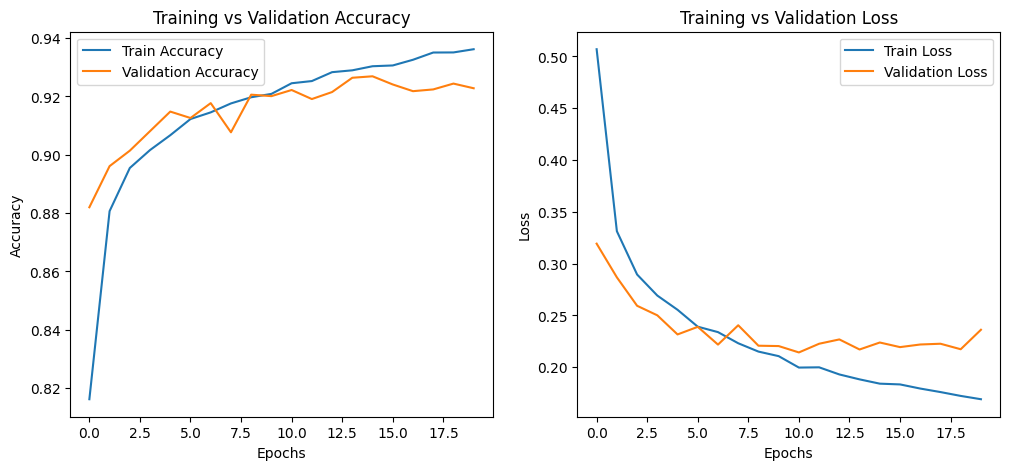

In [ ]:
# Import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Parameters
batch_size, epochs, num_classes = 64, 20, 10

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create the model with Dropout
fashion_model = Sequential()

# First Conv layer
fashion_model.add(Conv2D(32, (3,3), activation='linear', input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.25))   # Dropout after first pooling

# Second Conv layer
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Dropout(0.25))   # Dropout after second pooling

# Third Conv layer
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))

# Flatten + Dense layers
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.5))    # Dropout before final Dense
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
fashion_model.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

# Model summary
fashion_model.summary()

# Train the model
history = fashion_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)

# Evaluate on test set
score = fashion_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
IMDB SIMPLE RNN, BIDIRECTIONAL LSTM, LSTM AND GRU
SET B- 2
SET B-1 SENTIMENT140 DATASET